In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data_path = "dt_data.txt"
raw_df = pd.read_csv(data_path).set_index("Id")
df = raw_df
df['Enjoy'] = raw_df['Enjoy'].map({"Yes":True,"No":False})

In [3]:
from pandas.api.types import CategoricalDtype
for col in df.drop("Enjoy",axis=1).columns:
    column_data = df[col]
    categories = column_data.unique()
    cat_type = CategoricalDtype(categories)
    df[col] = column_data.astype(cat_type)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
feature_cols = df.iloc[:,:-1].columns.to_list()

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in range(6):
    X[:,col] = labelencoder.fit_transform(X[:,col])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [8]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy

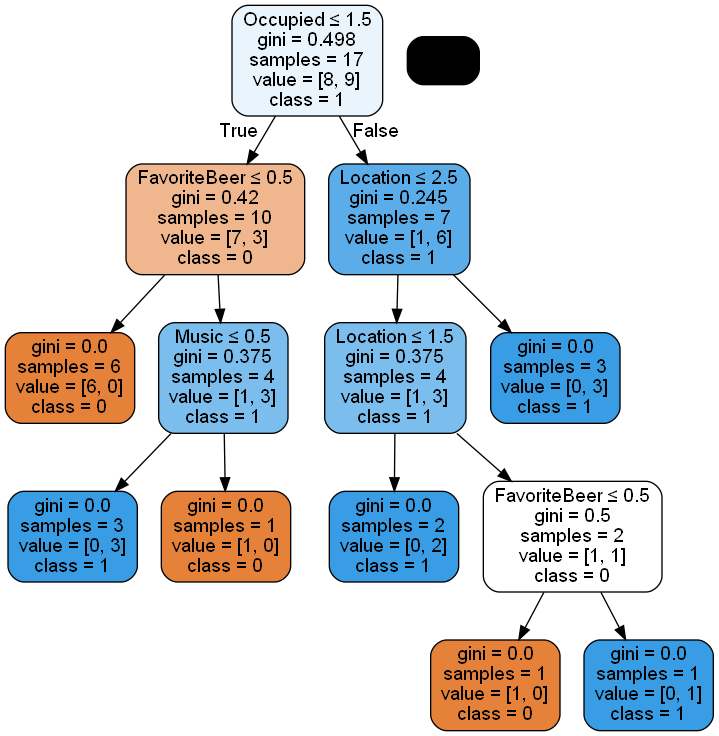

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())